In this notebook we shall download [Covid-19 Dataset](https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases) from **Kaggle**, analyse it and visualize some statistics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 14,
    titlepad = 10,
)
warnings.filterwarnings('ignore')

In [2]:
covid_df = pd.read_csv('./covid-variants.csv', index_col = 'date', parse_dates = True)
print(f'Size of dataset: {covid_df.shape}')
covid_df.head()

Size of dataset: (100416, 5)


,location,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Alpha,0,0.0,3
2020-07-06,Angola,B.1.1.277,0,0.0,3
2020-07-06,Angola,B.1.1.302,0,0.0,3
2020-07-06,Angola,B.1.1.519,0,0.0,3
2020-07-06,Angola,B.1.160,0,0.0,3


#### Check for missing values

In [3]:
z = covid_df.isnull().sum()
print(f'Columns with null values:\n{z[z > 0]}')

Columns with null values:
Series([], dtype: int64)


#### Which variants are we dealing with here?

In [4]:
print(covid_df['variant'].unique())

['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']


In [5]:
print(f'Total number of variants: {covid_df.variant.nunique()}')

Total number of variants: 24


In [6]:
print(f'Variant distribution:\n{covid_df.variant.value_counts()}')

Variant distribution:
B.1.1.519         4184
Delta             4184
Gamma             4184
B.1.367           4184
B.1.620           4184
non_who           4184
Omicron           4184
others            4184
Lambda            4184
B.1.1.302         4184
B.1.160           4184
B.1.221           4184
S:677P.Pelican    4184
B.1.1.277         4184
S:677H.Robin1     4184
Iota              4184
B.1.177           4184
Mu                4184
Epsilon           4184
Eta               4184
Beta              4184
Alpha             4184
B.1.258           4184
Kappa             4184
Name: variant, dtype: int64


We have a total of **`24`** variants! If you're like me then you should be wondering whether we do indeed have **`24`** *corona virus variants* plaguing the world! For this analysis we shall focus on the popular ones that you, me and the rest of the world are aware of. These are **Alpha, Beta, Gamma, Delta and Omicron**.

In [7]:
all_variants = covid_df['variant'].unique()
popular_variants = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron']

**Let's make sure that our list of `popular variants` are included in the list of variants in the dataset**

In [8]:
variants = [variant for variant in all_variants if variant in popular_variants]
print(variants)

['Alpha', 'Beta', 'Delta', 'Gamma', 'Omicron']


**Let's consider ONLY the `popular variants` in the dataset. Any variant that is not in the list of popular variants will be replaced with a `null or NaN` value**.

In [9]:
covid_df['variant'] = covid_df['variant'].map(lambda variant: variant if variant in variants else np.NaN)

In [10]:
print(f'Variant distribution (with popular variants only):\n{covid_df.variant.value_counts()}')

Variant distribution (with popular variants only):
Delta      4184
Alpha      4184
Beta       4184
Omicron    4184
Gamma      4184
Name: variant, dtype: int64


In [11]:
print(covid_df['variant'].unique())

['Alpha' nan 'Beta' 'Delta' 'Gamma' 'Omicron']


In [12]:
z = covid_df.isnull().sum()
print(f'Columns with null values:\n{z[z > 0]}')

Columns with null values:
variant    79496
dtype: int64


**We can drop those rows in the dataset with null values**

In [13]:
covid_df.dropna(inplace = True)
print(f'New size of dataset: {covid_df.shape}')

New size of dataset: (20920, 5)


In [14]:
covid_df.head()

,location,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Alpha,0,0.0,3
2020-07-06,Angola,Beta,0,0.0,3
2020-07-06,Angola,Delta,0,0.0,3
2020-07-06,Angola,Gamma,0,0.0,3
2020-07-06,Angola,Omicron,0,0.0,3


**Maybe we should rename to `location` column to `country` which is what it is**

In [15]:
covid_df.rename(columns = {'location': 'country'}, inplace = True)
covid_df.head()

,country,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Alpha,0,0.0,3
2020-07-06,Angola,Beta,0,0.0,3
2020-07-06,Angola,Delta,0,0.0,3
2020-07-06,Angola,Gamma,0,0.0,3
2020-07-06,Angola,Omicron,0,0.0,3


### Let's carry out a `variant-by-variant` analysis
We shall **group the dataset by variant** and **extract each group**...

In [16]:
#df_by_variant = covid_df.groupby('variant')['location', 'num_sequences', 'perc_sequences', 'num_sequences_total']
df_by_variant = covid_df.groupby('variant')          # preferred in order to keep tract of the variant

In [17]:
alpha_variant = df_by_variant.get_group('Alpha')
beta_variant = df_by_variant.get_group('Beta')
gamma_variant = df_by_variant.get_group('Gamma')
delta_variant = df_by_variant.get_group('Delta')
omicron_variant = df_by_variant.get_group('Omicron')

In [18]:
alpha_variant.head()

,country,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Alpha,0,0.0,3
2020-08-31,Angola,Alpha,0,0.0,1
2020-09-28,Angola,Alpha,0,0.0,10
2020-10-12,Angola,Alpha,0,0.0,29
2020-10-26,Angola,Alpha,0,0.0,7


In [19]:
beta_variant.head()

,country,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Beta,0,0.00,3
2020-08-31,Angola,Beta,1,100.00,1
2020-09-28,Angola,Beta,9,90.00,10
2020-10-12,Angola,Beta,24,82.76,29
2020-10-26,Angola,Beta,7,100.00,7


**Let's get the daily number of cases by variant around the world**...

In [20]:
alpha_global = alpha_variant.groupby(alpha_variant.index).sum()
beta_global = beta_variant.groupby(beta_variant.index).sum()
gamma_global = gamma_variant.groupby(gamma_variant.index).sum()
delta_global = delta_variant.groupby(delta_variant.index).sum()
omicron_global = omicron_variant.groupby(omicron_variant.index).sum()

In [21]:
alpha_global.head()

,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-05-11,0,0.0,16436
2020-05-25,0,0.0,12903
2020-06-08,0,0.0,9660
2020-06-22,0,0.0,16160
2020-07-06,0,0.0,15764


In [22]:
omicron_global.sample(5)

,num_sequences,perc_sequences,num_sequences_total
date,,,
2021-01-11,0,0.0,52251
2021-06-14,0,0.0,123104
2021-02-08,0,0.0,123716
2021-07-12,0,0.0,168725
2021-05-03,0,0.0,197254


In [23]:
delta_global.sample(5)

,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-08-03,0,0.00,19535
2021-02-22,133,63.71,133425
2021-03-08,139,90.66,150683
2020-06-22,0,0.00,16160
2021-09-20,324192,9098.14,327337


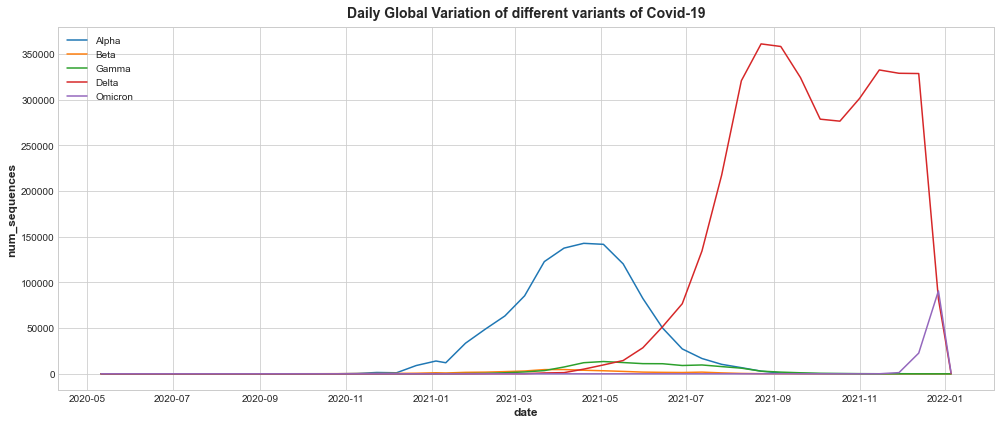

In [24]:
plt.figure(figsize = (14, 6))
sns.lineplot(x = alpha_global.index, y = alpha_global.num_sequences, label = 'Alpha')
sns.lineplot(x = beta_global.index, y = beta_global.num_sequences, label = 'Beta')
sns.lineplot(x = gamma_global.index, y = gamma_global.num_sequences, label = 'Gamma')
sns.lineplot(x = delta_global.index, y = delta_global.num_sequences, label = 'Delta')
sns.lineplot(x = omicron_global.index, y = omicron_global.num_sequences, label = 'Omicron')
plt.title('Daily Global Variation of different variants of Covid-19')
plt.legend()

### Country-by-Country Analysis

In [25]:
print(f'Number of countries: {covid_df.country.nunique()}\n')
print(covid_df.country.unique())

Number of countries: 121

['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'North Macedonia' 'Norway' 'Oman' 'Pakistan' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'

In [26]:
cases_by_country = covid_df.groupby('country')['num_sequences'].sum()
cases_by_country.head()

country
Angola         769
Argentina     4934
Aruba         2442
Australia    31538
Austria      10466
Name: num_sequences, dtype: int64

**Let's visualize the top 20 countries**...

In [27]:
cases_by_country_df = pd.DataFrame(cases_by_country.sort_values(ascending = False)[:20])
cases_by_country_df.head()

,num_sequences
country,
United States,1627646
United Kingdom,1414796
Germany,295267
Denmark,225512
Japan,140295


Text(0, 0.5, 'Total Cases x $10^6$')

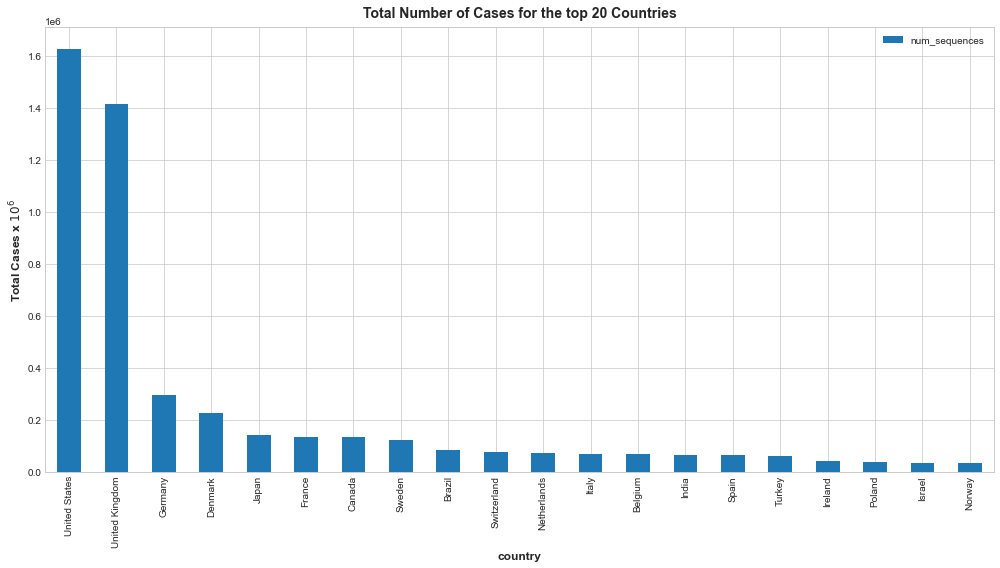

In [28]:
cases_by_country_df.plot(kind = 'bar', figsize = (14, 8))
plt.title('Total Number of Cases for the top 20 Countries')
plt.ylabel('Total Cases x $10^6$')

This analysis could not provide answers to the following observations:
* Probably the only news here is that **no African** country is found in the **top 20** countries affected by the virus. Either the **collection of data on the continent is inefficient** or the **population is immuned** to the virus! One would have expected that African countries with low vaccination rates should feature among the list.  

* **United Kingdom** is not out of Europe perse but her figures are not comparable to those on the continent. This is more like an outlier and this analysis could capture the reason.

* **China** where the outbreak started is conspicuosly absent from the top 20 as well.

* The **United States** is alone with an alarmingly large number of cases! Just like UK, US's figure is more like an outlier! 

#### A Pie chart representation of the above

array([<AxesSubplot:ylabel='num_sequences'>], dtype=object)

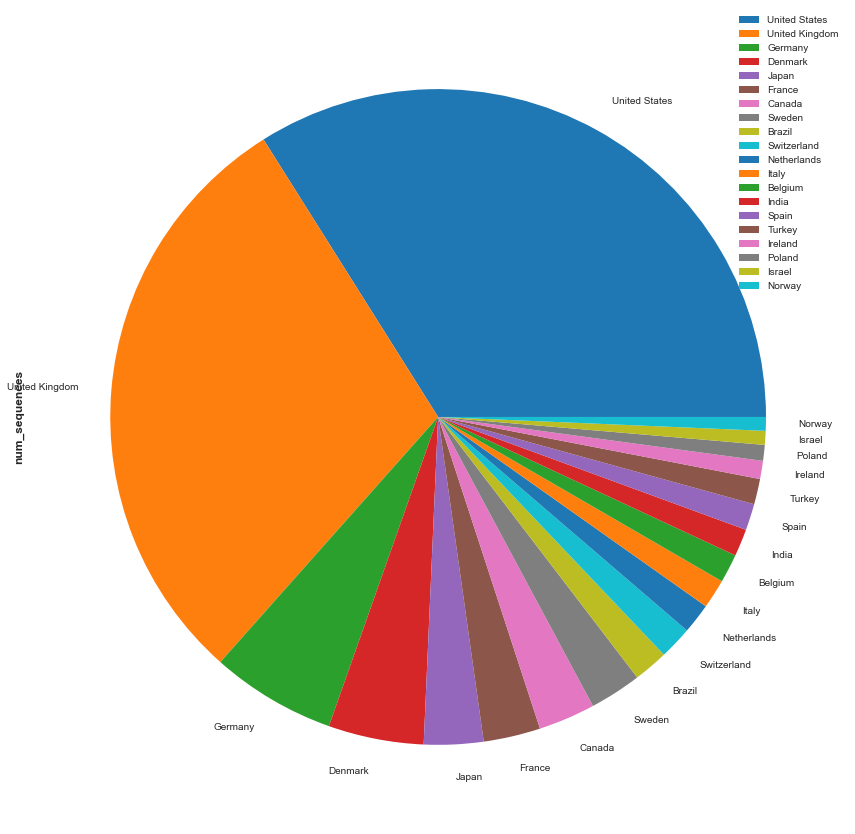

In [30]:
cases_by_country_df.plot(kind = 'pie', subplots = True, figsize = (12, 12))

#### Global Variation in the total number of cases

Text(0.5, 1.0, 'Global Daily Variation in the number of caese')

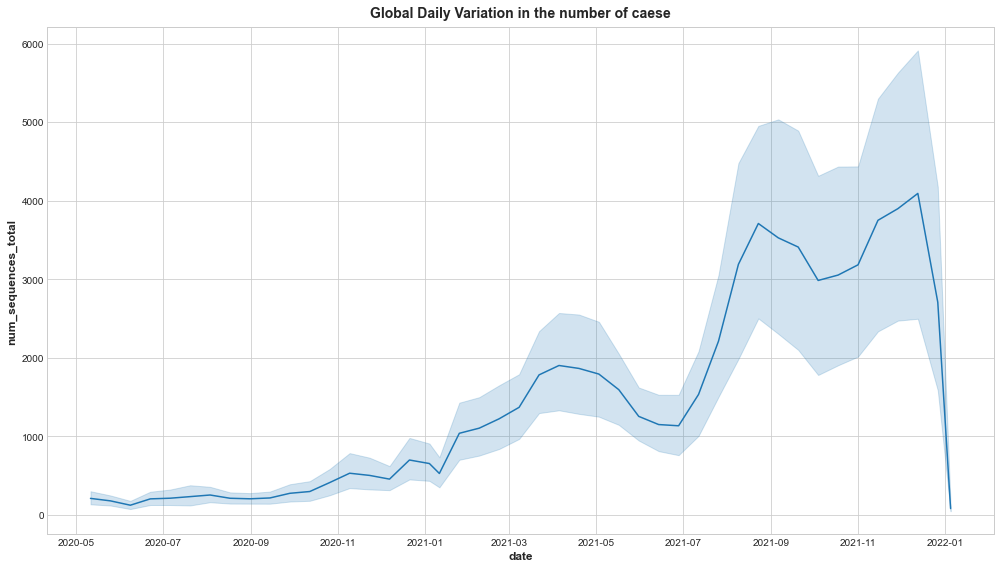

In [31]:
plt.figure(figsize = (14, 8))
sns.lineplot(x = covid_df.index, y = covid_df.num_sequences_total)
plt.title('Global Daily Variation in the number of caese')

In [32]:
variant_by_country = covid_df.groupby(['country', 'variant'])['num_sequences'].sum()
variant_by_country.head()

country  variant
Angola   Alpha      156
         Beta       452
         Delta      160
         Gamma        1
         Omicron      0
Name: num_sequences, dtype: int64

In [33]:
variant_by_country_df = pd.DataFrame(variant_by_country.sort_values(ascending = False)[:20])
variant_by_country_df.head()

num_sequences
country        variant               
United States  Delta          1327443
United Kingdom Delta          1085714
               Alpha           262781
United States  Alpha           239829
Germany        Delta           185698

Text(0, 0.5, 'Total Cases x $10^6$')

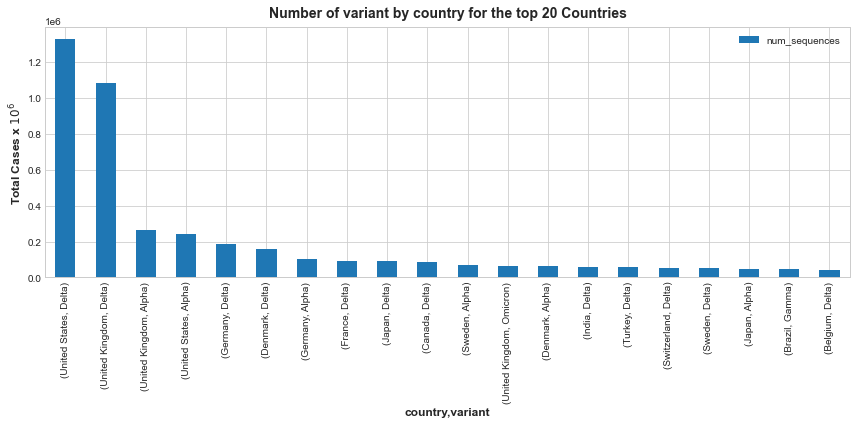

In [34]:
variant_by_country_df.plot(kind = 'bar', figsize = (12, 6))
plt.title('Number of variant by country for the top 20 Countries')
plt.ylabel('Total Cases x $10^6$')